In [112]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from __future__ import division
import random

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

sns.set(style="whitegrid")
%matplotlib inline

pd.set_option('display.max_columns', None)

# Exploratory analysis

In [2]:
df1 = pd.read_csv("donations.csv")
df2 = pd.read_csv("essays.csv")
df3 = pd.read_csv("projects.csv")
df4 = pd.read_csv("outcomes.csv")
df5 = pd.read_csv("resources.csv")

## Data Summary

In [25]:
project_num = len(df3['projectid'].unique())
project_w_outcome = len(df4['projectid'].unique())
project_funded = len(df1['projectid'].unique())
project_fully_funded = len(df4[df4.fully_funded == 't']['projectid'].unique())

teacher_num = df1['is_teacher_acct']. value_counts()

print project_num, "Projects are posted." 
print project_w_outcome, "Projects are traced."
print project_funded, "Projects are funded."
print project_fully_funded, "Projects are fully funded.\n"

print "By", len(df1['donor_acctid'].unique()), "donors."
print "Among them, 358918 are teachers."

#print "Essays", len(df2['projectid'].unique())
#print "Resources", len(df5['projectid'].unique())

664098 Projects are posted.
619326 Projects are traced.
525042 Projects are funded.
430683 Projects are fully funded.

By 1282092 donors.
Among them, 358918 are teachers.


## Features candidates

In [9]:
df1_head = pd.DataFrame({'DONATIONS' : df1.columns})
df2_head = pd.DataFrame({'ESSAYS' : df2.columns})
df3_head = pd.DataFrame({'PROJECTS' : df3.columns})
df4_head = pd.DataFrame({'OUTCOMES' : df4.columns})
df5_head = pd.DataFrame({'RESOURCES' : df5.columns})

In [26]:
headers = pd.concat([df1_head, df2_head, df3_head, df4_head, df5_head], ignore_index=True, axis=1)
headers.columns =['DONATIONS', 'ESSAYS', 'PROJECTS','OUTCOMES','RESOURCES']
attr_num = headers.count().sum()-len(headers.columns)

In [27]:
print "There are", attr_num, "attributes."

There are 79 attributes.


In [28]:
headers

,DONATIONS,ESSAYS,PROJECTS,OUTCOMES,RESOURCES
0,donationid,projectid,projectid,projectid,resourceid
1,projectid,teacher_acctid,teacher_acctid,is_exciting,projectid
2,donor_acctid,title,schoolid,at_least_1_teacher_referred_donor,vendorid
3,donor_city,short_description,school_ncesid,fully_funded,vendor_name
4,donor_state,need_statement,school_latitude,at_least_1_green_donation,project_resource_type
5,donor_zip,essay,school_longitude,great_chat,item_name
6,is_teacher_acct,NaN,school_city,three_or_more_non_teacher_referred_donors,item_number
7,donation_timestamp,NaN,school_state,one_non_teacher_referred_donor_giving_100_plus,item_unit_price
8,donation_to_project,NaN,school_zip,donation_from_thoughtful_donor,item_quantity
9,donation_optional_support,NaN,school_metro,great_messages_proportion,NaN


## Distribution of data over time

In [29]:
df1['date'] = pd.to_datetime(df1['donation_timestamp'])
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
donation_year= df1.groupby('year').size().reset_index(name="donation_count")
donation_month= df1.groupby('month').size().reset_index(name="donation_count")

In [30]:
df3['date'] = pd.to_datetime(df3['date_posted'])
df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
project_year= df3.groupby('year').size().reset_index(name="project_count")
project_month= df3.groupby('month').size().reset_index(name="project_count")

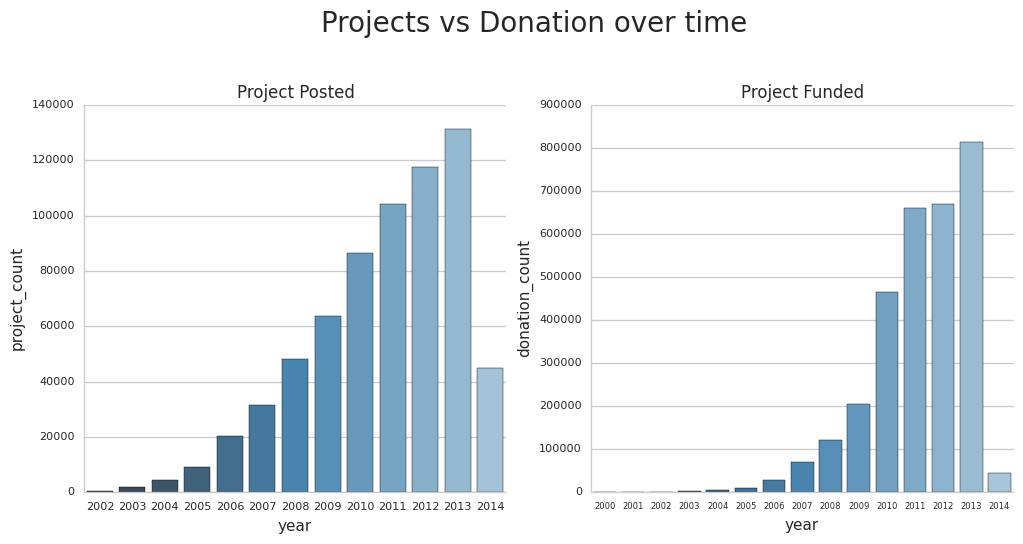

In [35]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,5),ncols=2)
plt.suptitle("Projects vs Donation over time", y = 1.09, fontsize=20)
ax1.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='y', labelsize=8)
ax1.set_title('Project Posted')
ax2.set_title('Project Funded')

sns.barplot(x='year', y='project_count', data=project_year, palette="Blues_d", ax=ax1)
sns.barplot(x='year', y='donation_count', data=donation_year, palette="Blues_d", ax=ax2)
sns.despine()


In [37]:
posting_corr= project_year['year'].corr(project_year['project_count'])
donation_corr= donation_year['year'].corr(donation_year['donation_count'])

In [39]:
print "Project Posting by time has a", posting_corr, "correlation."
print "Project funding by time has a", donation_corr, "correlation."

Project Posting by time has a 0.844306566674 correlation.
Project funding by time has a 0.714382160928 correlation.


### Interesting fact 1 : what happended in 2010? 
#### Project funding incresed dramatically that year.

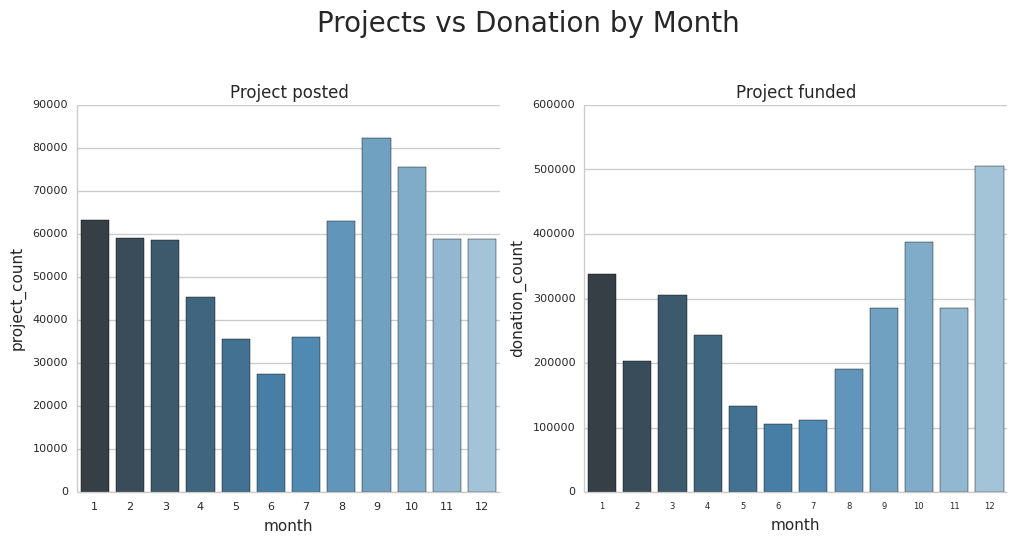

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,5),ncols=2)
plt.suptitle("Projects vs Donation by Month", y = 1.09, fontsize=20)
ax1.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='y', labelsize=8)
ax1.set_title('Project posted')
ax2.set_title('Project funded')

sns.barplot(x='month', y='project_count', data=project_month, palette="Blues_d", ax=ax1)
sns.barplot(x='month', y='donation_count', data=donation_month, palette="Blues_d", ax=ax2)
sns.despine()

### Interesting fact 2 : 
#### 1) Projects are mostly posted in September when school starts.
#### 2) December is a GIVING month.

In [44]:
df1.groupby('month')['donation_total'].sum()

month
1     19001003.59
2     16399155.67
3     20647805.85
4     16152077.72
5     12393573.19
6      8648733.72
7      8612297.87
8     15522616.09
9     21187627.61
10    35159244.48
11    23372212.00
12    40447867.73
Name: donation_total, dtype: float64

## Data Story

### From Posting to Funding

In [55]:
merge1 = df1.merge(df3,on='projectid').merge(df4,on='projectid')

In [56]:
funded_time = merge1[['projectid','donation_timestamp','date_posted', 'fully_funded', 'is_exciting']].copy()

In [57]:
funded_time['to'] = pd.to_datetime(funded_time['donation_timestamp'])
funded_time['fr'] = pd.to_datetime(funded_time['date_posted'])
funded_time['diff']= funded_time['to']-funded_time['fr']
funded_time['days'] = funded_time['diff'].dt.days

In [59]:
funded_time=funded_time.drop(['to'], axis=1)
funded_time=funded_time.drop(['fr'], axis=1)
funded_time=funded_time.drop(['diff'], axis=1)
funded_time.head()

,projectid,donation_timestamp,date_posted,fully_funded,is_exciting,days
0,ffffac55ee02a49d1abc87ba6fc61135,2011-08-25 14:27:34.807,2011-06-11,t,f,75
1,ffffac55ee02a49d1abc87ba6fc61135,2011-11-04 07:54:21.552,2011-06-11,t,f,146
2,ffffac55ee02a49d1abc87ba6fc61135,2011-11-02 22:53:53.019,2011-06-11,t,f,144
3,ffffac55ee02a49d1abc87ba6fc61135,2011-11-03 23:54:01.109,2011-06-11,t,f,145
4,ffffac55ee02a49d1abc87ba6fc61135,2011-11-02 23:21:00.043,2011-06-11,t,f,144


In [61]:
funded_time.groupby(['fully_funded','is_exciting']).days.agg(['mean', 'count'])

mean    count
fully_funded is_exciting                    
f            f            61.980284   284748
t            f            35.273695  2370884
             t            32.634078   442357

### Interesting fact 3: 
#### 1) Average time of from posting to funding is 34.9 days
#### 2) It probably doesn't matter how exciting a project is to get funded

### Teacher VS Posting

In [46]:
posted_poject_num = len(df2)
teacher_num = len(df2['teacher_acctid'].unique())
average = len(df2['projectid'].unique())/len(df2['teacher_acctid'].unique())

print posted_poject_num, "projects are posted."
print "By", teacher_num, "teachers."
print "The average number of postings per teacher would be", average

664098 projects are posted.
By 249555 teachers.
The average number of postings per teacher would be 2.66112880928


In [47]:
dominant = df2.groupby('teacher_acctid').size().reset_index(name="project_number")
dominant_teacher = dominant.groupby('project_number').size().reset_index(name="teacher_number")

In [48]:
dominant_teacher.tail(5)

,project_number,teacher_number
149,212,1
150,216,1
151,232,1
152,237,1
153,266,1


In [49]:
dominant_teacher.head(5)

,project_number,teacher_number
0,1,141117
1,2,47549
2,3,21883
3,4,11450
4,5,6780


### Interesting fact 4: 
#### 1) some teachers posted more than 200 projects while 57% of teachers posted only ONE project!
#### 2) The average number of postings per teacher is 2.67

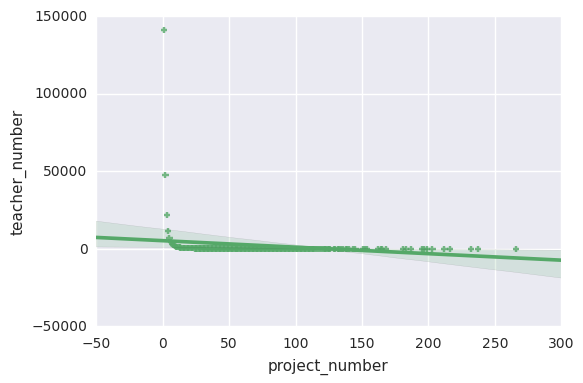

In [62]:
sns.set(color_codes=True)
sns.regplot(x='project_number', y='teacher_number', data=dominant_teacher, color="g", marker="+")

### How far between Projects and Donors 

In [64]:
zipcode = merge1[['projectid','donor_zip', 'school_zip']].copy()

In [65]:
same_zipcode = len(zipcode[zipcode.donor_zip == zipcode.school_zip]['projectid'].unique())

In [95]:
print same_zipcode/project_funded, "% of donors live in the same zip code as projects that they funded."

0.121316009005 % of donors live in the same zip code as projects that they funded.


#### Zip code doesn't matter. Only 12% of donors live in the same zip code as projects that they funded.

### Traditional Public schools VS Charter schools

In [78]:
schools = merge1[['projectid','school_charter','school_magnet','school_year_round','school_nlns',
                   'school_kipp','school_charter_ready_promise','is_exciting','fully_funded']].copy()

In [79]:
traditional=schools[(schools['school_charter']=="f")&(schools['school_magnet']=="f")&
    (schools['school_year_round']=="f")&(schools['school_nlns']=="f")&
    (schools['school_kipp']=="f")&(schools['school_charter_ready_promise']=="f")]

In [80]:
charter=schools[(schools['school_charter']=="t")|(schools['school_magnet']=="t")|
    (schools['school_year_round']=="t")|(schools['school_nlns']=="t")|
    (schools['school_kipp']=="t")|(schools['school_charter_ready_promise']=="t")]

In [82]:
traditional['fully_funded'].value_counts()

t    2084569
f     222455
Name: fully_funded, dtype: int64

In [83]:
charter['fully_funded'].value_counts()

t    728672
f     62293
Name: fully_funded, dtype: int64

In [88]:
print "Total projects:", project_funded
print "From Traditional public schools:", len(traditional['projectid'].unique())
print "From Charter schools:", len(charter['projectid'].unique())

Total projects: 525042
From Traditional public schools: 401827
From Charter schools: 123215


In [91]:
traditional['is_exciting'].value_counts(normalize=True)

f    0.861076
t    0.138924
Name: is_exciting, dtype: float64

In [92]:
charter['is_exciting'].value_counts(normalize=True)

f    0.84594
t    0.15406
Name: is_exciting, dtype: float64

In [93]:
print "% of interesting projects at Traditional public schools: 0.13892"
print "% of interesting projects at Chater schools:             0.15406"

% of interesting projects at Traditional public schools: 0.13892
% of interesting projects at Chater schools:             0.15406


#### School type doest't matter to get funded
1) 401,827 projects from traditional public schools.

2) 123,215 projects from charter-ish schools.

3) 81.3% of traditional public school projects are fully funded.

4) 83.9% of charter school projects are fully funded.


# Questions for the Project Partner

#### Relationship between donors and schools that he/she supports 
    1) Do donors have their own (grand)child(ren) at the school?
    2) Are donors and teachers family or friends?
    3) Are donors alumni of the school?

# MODELING

## Data preparation

In [97]:
merge1['date_posted']= pd.to_datetime(merge1['date_posted'])

In [192]:
tmp = merge1.loc[merge1['date_posted'].dt.year==2013]

In [193]:
len(tmp)

802970

In [157]:
# Randomly sample 10% of 2013 dataframe
#sample_10 = sample.sample(frac=0.1)
#sample_20 = sample.sample(frac=0.2)
#sample_30 = sample.sample(frac=0.3)

In [194]:
# Selct some features
sample_features = tmp[['is_teacher_acct','donation_timestamp','school_charter',
            'school_magnet','school_year_round','school_nlns', 'school_kipp','school_charter_ready_promise',
            'poverty_level','grade_level','date_posted','is_exciting','at_least_1_teacher_referred_donor',
            'at_least_1_green_donation','great_chat','three_or_more_non_teacher_referred_donors',
            'one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor',
            'fully_funded']].copy()

In [195]:
# Prediction Target: fully_funded
sample_features['fully_funded'] = sample_features['fully_funded'].map({'t': 1, 'f': 0})

# Month
sample_features['donation_timestamp'] = pd.to_datetime(sample_features['donation_timestamp'])
sample_features['date_posted'] = pd.to_datetime(sample_features['date_posted'])
sample_features['posted_month'] = sample_features['date_posted'].dt.month
sample_features['funded_month'] = sample_features['donation_timestamp'].dt.month

# Structured Features
sample_features['is_exciting'] = sample_features['is_exciting'].map({'t': 1, 'f': 0})
sample_features['at_least_1_teacher_referred_donor'] = sample_features['at_least_1_teacher_referred_donor'].map({'t': 1, 'f': 0})
sample_features['at_least_1_green_donation'] = sample_features['at_least_1_green_donation'].map({'t': 1, 'f': 0})
sample_features['great_chat'] = sample_features['great_chat'].map({'t': 1, 'f': 0})
sample_features['three_or_more_non_teacher_referred_donors'] = sample_features['three_or_more_non_teacher_referred_donors'].map({'t': 1, 'f': 0})
sample_features['one_non_teacher_referred_donor_giving_100_plus'] = sample_features['one_non_teacher_referred_donor_giving_100_plus'].map({'t': 1, 'f': 0})
sample_features['donation_from_thoughtful_donor'] = sample_features['donation_from_thoughtful_donor'].map({'t': 1, 'f': 0})

# Grade Level
sample_features['grade_level'].replace('nan',0, inplace=True)
sample_features['grade_level'].replace('Grades PreK-2',1, inplace=True)
sample_features['grade_level'].replace('Grades 3-5',2, inplace=True)
sample_features['grade_level'].replace('Grades 6-8',3, inplace=True)
sample_features['grade_level'].replace('Grades 9-12',4, inplace=True)

# Poverty Level
sample_features['poverty_level'].replace('low poverty',0, inplace=True)
sample_features['poverty_level'].replace('moderate poverty',1, inplace=True)
sample_features['poverty_level'].replace('high poverty',2, inplace=True)
sample_features['poverty_level'].replace('highest poverty',3, inplace=True)

# School Type
sample_features['school_charter'] = sample_features['school_charter'].map({'t': 1, 'f': 0})
sample_features['school_magnet'] = sample_features['school_magnet'].map({'t': 1, 'f': 0})
sample_features['school_year_round'] = sample_features['school_year_round'].map({'t': 1, 'f': 0})
sample_features['school_nlns'] = sample_features['school_nlns'].map({'t': 1, 'f': 0})
sample_features['school_kipp'] = sample_features['school_kipp'].map({'t': 1, 'f': 0})
sample_features['school_charter_ready_promise'] = sample_features['school_charter_ready_promise'].map({'t': 1, 'f': 0})

# Teacher Account
sample_features['is_teacher_acct'] = sample_features['is_teacher_acct'].map({'t': 1, 'f': 0})

In [196]:
# Drop data columns
sample_features=sample_features.drop(['donation_timestamp'], axis=1)
sample_features=sample_features.drop(['date_posted'], axis=1)

In [197]:
sample_features.head()

,is_teacher_acct,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,poverty_level,grade_level,is_exciting,at_least_1_teacher_referred_donor,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,fully_funded,posted_month,funded_month
12,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,1,3,5
13,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,1,3,3
14,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,1,3,3
15,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,1,3,5
16,0,0,0,0,0,0,0,2,2,1,1,1,1,0,1,0,1,3,5


## Data split into training and validation

In [198]:
# Target to predict
colsToDrop = ['fully_funded']

In [199]:
Y = sample_features['fully_funded']
X = sample_features.drop(colsToDrop, axis=1)

rows = random.sample(sample_features.index, int(len(sample_features)*.80))

x_train, y_train = X.ix[rows],Y.ix[rows]
x_test,y_test  = X.drop(rows),Y.drop(rows)

## Gradient Tree Boosting Model

In [200]:
params = {'n_estimators': 500, 'max_depth': 6,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}

In [201]:
model = GradientBoostingRegressor(**params).fit(x_train, y_train)

In [202]:
mse = mean_squared_error(y_test, model.predict(x_test))
r2 = r2_score(y_test, model.predict(x_test))

print("MSE: %.4f" % mse)
print("R2: %.4f" % r2)

MSE: 0.0469
R2: 0.4627


In [203]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

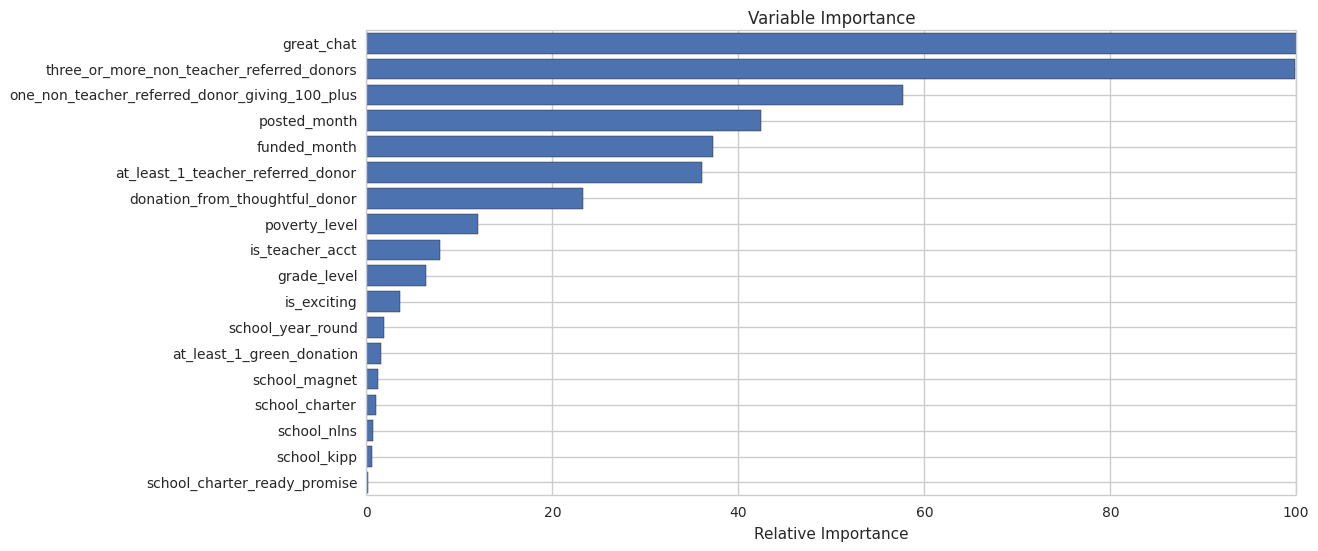

In [204]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()